In [105]:
from math import log, sqrt, pi, exp
import scipy.stats as stats
from datetime import datetime, date
import numpy as np
import pandas as pd
import math

In [106]:
def buildTree(S, vol, T, N):
    dt = T/N
    matrix = np.zeros((N+1, N+1))
    u = math.exp(vol*math.sqrt(dt))
    d = math.exp(-vol*math.sqrt(dt))
    #Iterateoverthelowertriangle

    for i in np.arange(N+1): # iterate over rows
        for j in np.arange(i+1): # iterate over columns

            #Hint:express each cell as acombination of up and down moves
            matrix[i,j] = S * u ** j * d ** (i - j)

    return matrix


In [107]:

def valueOptionMatrix(tree, T, r ,K, vol) :
    dt = T / N
    u = math.exp(vol*math.sqrt(dt))
    d = math.exp(-vol*math.sqrt(dt))
    p = (math.exp(r*dt) - d) / (u - d)

    columns = tree.shape[1]
    rows = tree.shape[0]
    # Walk backward , we start in last row of the matrix
    # Add the payoff function in the last row
    for c in np.arange(columns):
        S = tree[rows - 1, c] # value in the matrix
        tree[rows - 1, c] = 0 if S > K else tree[0][0] - S
    
    # For all other rows, we need to combine from previous rows
    # We walk backwards, from the last row to the first row
    for i in np.arange(rows - 1)[::-1]:
        for j in np.arange(i + 1):
            down = tree[i + 1, j]
            up = tree[i + 1, j + 1]
            tree[i, j] = math.exp(-r*dt) * (p * up + (1 - p) * down)
    
    return tree

sigma = 0.4
S = 50
T = 0.4167
N = 5

K = 52
r = 0.1

tree = buildTree(S,sigma,T,N)
print(tree)

matrix = valueOptionMatrix(tree, T, r, K, sigma)
print(matrix)

[[50.          0.          0.          0.          0.          0.        ]
 [44.54715686 56.12030433  0.          0.          0.          0.        ]
 [39.68898369 50.         62.98977115  0.          0.          0.        ]
 [35.36062765 44.54715686 56.12030433 70.70010253  0.          0.        ]
 [31.50430853 39.68898369 50.         62.98977115 79.35422539  0.        ]
 [28.06854748 35.36062765 44.54715686 56.12030433 70.70010253 89.06766557]]
[[ 4.31914656  0.          0.          0.          0.          0.        ]
 [ 6.66298713  2.11418898  0.          0.          0.          0.        ]
 [ 9.85581307  3.67220678  0.63600521  0.          0.          0.        ]
 [13.81287948  6.17551447  1.30171162  0.          0.          0.        ]
 [18.08072304  9.89604788  2.66421269  0.          0.          0.        ]
 [21.93145252 14.63937235  5.45284314  0.          0.          0.        ]]


In [3]:
#black scholes formula:
C = N1 *S - N2 *K*e**()

Consider again a short position in a European call option on a non-dividend-paying stock with
a maturity of one year and strike price K of e99. Let the one year interest rate be 6% and the
current price of the stock be e100. Furthermore, assume that the volatility is 20%

 Use the Euler method to perform a hedging simulation. Do an experiment where the
volatility in the stock price process is matching the volatility used in the delta computation
(set both equal to 20%). Vary the frequency of the hedge adjustment (from daily to weekly)
and explain the results. Perform numerical experiments where the volatility in the stock
price process is not matching the volatility used in the delta valuation. Experiment for
various levels and explain the results.




In [28]:
S = 100

In [61]:
x0 = 0
y0 = 1
xf = 100
n = 1000
deltax = (xf-x0)/(n-1)

In [62]:
x = np.linspace(x0,xf,n)
y = np.zeros([n])

In [63]:
y[0] = y0
for i in range(1,n):
    y[i]= deltax*(-y[i-1]+np.sin(x[i-1]))+y[i-1]

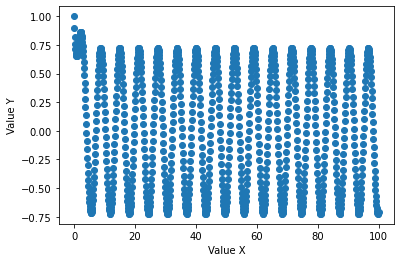

In [64]:
plt.plot(x,y,'o')
plt.xlabel("Value X")
plt.ylabel("Value Y")
plt.show()

In [122]:
def BSM(T, r, K, S, sigma):
    d1 =(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))
    d2 = d1 - (sigma*np.sqrt(T))
    Nd1 = stats.norm.cdf(d1)
    Nd2 = stats.norm.cdf(d2)

    V = (S*Nd1) - (np.exp(-r*T)*K*Nd2)

    return V

In [94]:
sigma = 0.2
S = 100
T = 1
N = 100
K = 99
r = 0.06

In [95]:
bs_call = BSM(T, r, K, S, sigma)
print(bs_call)

11.544280227051097


In [76]:
x = np.linspace(x0,xf,n)
y = np.zeros([n])
y[0] = y0
for i in range(1,M):
    y[i]= deltax*(-y[i-1]+np.sin(x[i-1]))+y[i-1]

NameError: name 'M' is not defined

Euler Method

In [134]:
def Euler(S,M,r,sigma,T):
    stock_list = []
    stock_list.append(S)
    dt = T/M

    for i in range(M):
        x = np.random.normal(loc = 0.0, scale=1)
        St = S + (r*S*dt)+sigma*S*sqrt(dt)*x
        
        S = St
        stock_list.append(St)

    return(stock_list)

In [135]:
M = 365

In [136]:
def delta_BSM(T, r, K, S, sigma):
    d1 = (((np.log(S/K)) + (r + 0.5*sigma**2)* T) / (sigma*np.sqrt(T)))
    Nd1 = stats.norm.cdf(d1)

    return Nd1

In [137]:
S = 100
K = 99
M = 365
r = 0.06
sigma = 0.2
T = 1
dt = T/M

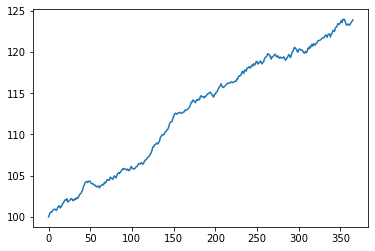

In [138]:
prices = Euler(S, M, T, r, sigma)
plt.plot(prices)
plt.show()
dt = T/M

hedge = []
for m in range(M):
    Sm = prices[m]
    TtE = T - m*dt

    delta = delta_BSM(TtE, r, K, Sm, sigma)
    hedge.append(delta)

hedge_change = [hedge[i + 1] - hedge[i] for i in range(len(hedge)-1)]

plt.plot(hedge_change)
plt.show()

In [139]:
dBSM = delta_BSM(T, r, K, S, sigma)
print("Delta BSM = ", dBSM)

Delta BSM =  0.6737355117348961


In [129]:
def delta_Tree(T, r, K, S, sigma, N):
    tree = buildTree(S, sigma, T, N)
    dS = tree[1][1] - tree[1][0]

    c_tree = valueOptionMatrix(tree, T, r, K, sigma)
    dc = c_tree[1][1] = c_tree[1][0]

    delta = dc / dS

    return delta

In [140]:
vols = np.linspace(start=5, stop = 95, num=19)
BSM_vals = []
Binos_vals = []

for vol in vols:
    d_BSMvol = delta_BSM(T, r, K, S, (vol/100))

    d_BinoVol = delta_Tree(T, r, K, S, (vol/100), 50)

    BSM_vals.append(d_BSMvol)
    Binos_vals.append(d_BinoVol)

BSM_values = np.array(BSM_vals)
Binomial_values = np.array(Binos_vals)

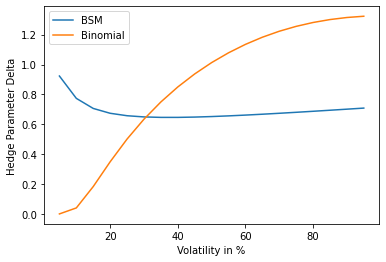

In [141]:
plt.plot(vols, BSM_vals, label = "BSM")
plt.plot(vols, Binos_vals, label = "Binomial")
plt.xlabel("Volatility in %")
plt.ylabel("Hedge Parameter Delta")
plt.legend()
plt.show()
